# Simple Linear Regression Part 2

Linear Regression is the simplest form of regression. The dependent variable is continuous; however, the relationship between the dependent variable and indepedent variables is assumed to be linear. 

# Equation: y = mx + b

y: dependent variable (target)   
x: independent variable (predictor)
m: constant and slope or gradient   
b: intercept


1. There must be a linear relation between independent and dependent variables. 
2. There should not be any outliers present. 
3. No heteroscedasticity 
4. Sample observations should be independent. 
5. Error terms should be normally distributed with mean 0 and constant variance. 
6. Absence of multicollinearity and auto-correlation.



Classification trees have dependent variables that are categorical or label and unordered. Example: Pass or Fail. Regression trees have dependent variables that are continuous values or ordered whole values. Example; Percentages. Regression means to predict the output value using training data. Classification means to group the output into a class. 

Data Preprocessing

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [15]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [16]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1.172000e+03
mean,7.013959,7.161143,6.868012,7.015776,7.015776,3.785747e+07
std,4.880564,4.985040,4.779099,4.887464,4.887464,3.456219e+07
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,2.710000,2.780000,2.660000,2.707500,2.707500,1.308202e+07
50%,4.250000,4.350000,4.175000,4.275000,4.275000,2.900380e+07
75%,11.585000,11.785000,11.310000,11.555000,11.555000,5.064272e+07
max,24.940001,27.299999,24.629999,25.260000,25.260000,3.250584e+08


Explore Features

In [17]:
features = dataset[['Open','High','Low','Close','Adj Close','Volume']]
features.head(9)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600
2014-01-10,4.09,4.20,4.07,4.17,4.17,20840800
2014-01-13,4.19,4.20,4.09,4.13,4.13,22856100
2014-01-14,4.14,4.30,4.13,4.30,4.30,42434800


In [18]:
target = dataset['Adj Close']
target.head(9)

Date
2014-01-02    3.95
2014-01-03    4.00
2014-01-06    4.13
2014-01-07    4.18
2014-01-08    4.18
2014-01-09    4.09
2014-01-10    4.17
2014-01-13    4.13
2014-01-14    4.30
Name: Adj Close, dtype: float64

Plot Each Features

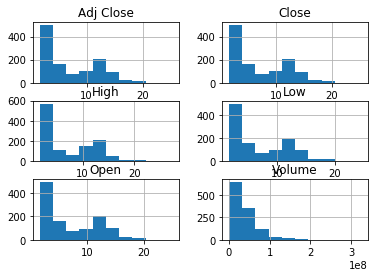

In [27]:
viz = dataset[['Open','High','Low','Close','Adj Close','Volume']]
viz.hist()
plt.show()

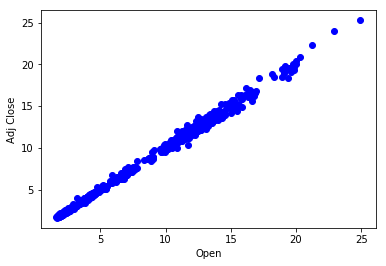

In [20]:
plt.scatter(features.Open, target,  color='blue')
plt.xlabel("Open")
plt.ylabel("Adj Close")
plt.show()

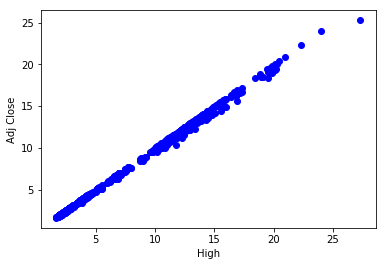

In [21]:
plt.scatter(features.High, target,  color='blue')
plt.xlabel("High")
plt.ylabel("Adj Close")
plt.show()

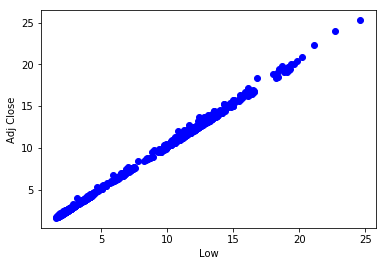

In [22]:
plt.scatter(features.Low, target,  color='blue')
plt.xlabel("Low")
plt.ylabel("Adj Close")
plt.show()

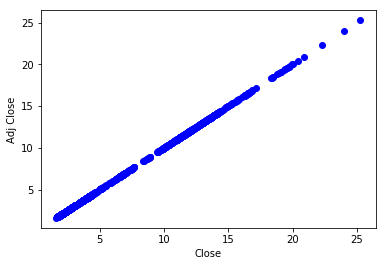

In [23]:
plt.scatter(features.Close, target,  color='blue')
plt.xlabel("Close")
plt.ylabel("Adj Close")
plt.show()

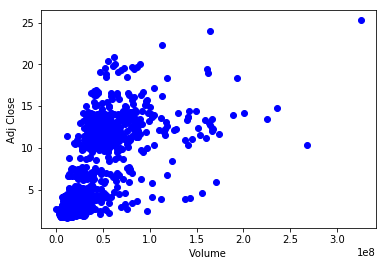

In [24]:
plt.scatter(features.Volume, target,  color='blue')
plt.xlabel("Volume")
plt.ylabel("Adj Close")
plt.show()

Create Train and Test dataset

In [30]:
msk = np.random.rand(len(dataset)) < 0.8
train = features[msk]
test = features[~msk]

Simple Regression Model

Train Data distribution

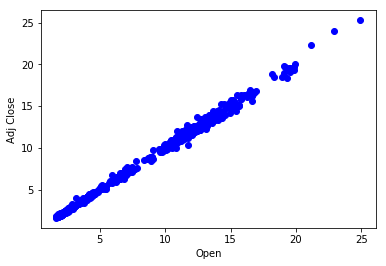

In [31]:
plt.scatter(train['Open'], train['Adj Close'],  color='blue')
plt.xlabel("Open")
plt.ylabel("Adj Close")
plt.show()

In [32]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X_train = np.asanyarray(train[['Open']])
y_train = np.asanyarray(train[['Adj Close']])
regr.fit (X_train, y_train)
# The coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ',regr.intercept_)

Coefficients:  [[0.99949051]]
Intercept:  [0.0039706]


Text(0,0.5,'Adj Close')

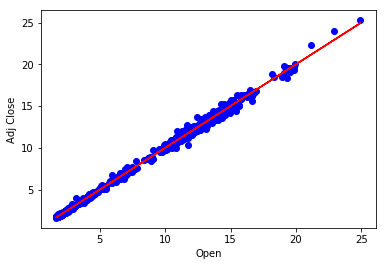

In [34]:
plt.scatter(train.Open, train['Adj Close'],  color='blue')
plt.plot(X_train, regr.coef_[0][0]*X_train + regr.intercept_[0], '-r')
plt.xlabel("Open")
plt.ylabel("Adj Close")

In [35]:
from sklearn.metrics import r2_score

X_test = np.asanyarray(test[['Open']])
y_test = np.asanyarray(test[['Adj Close']])
y_pred = regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test))

Mean absolute error: 0.14
Residual sum of squares (MSE): 0.06
R2-score: 1.00
